# Charting 03

In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:

# download stock price data
symbol = 'SBIN.NS'
df = yf.download(symbol, start='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


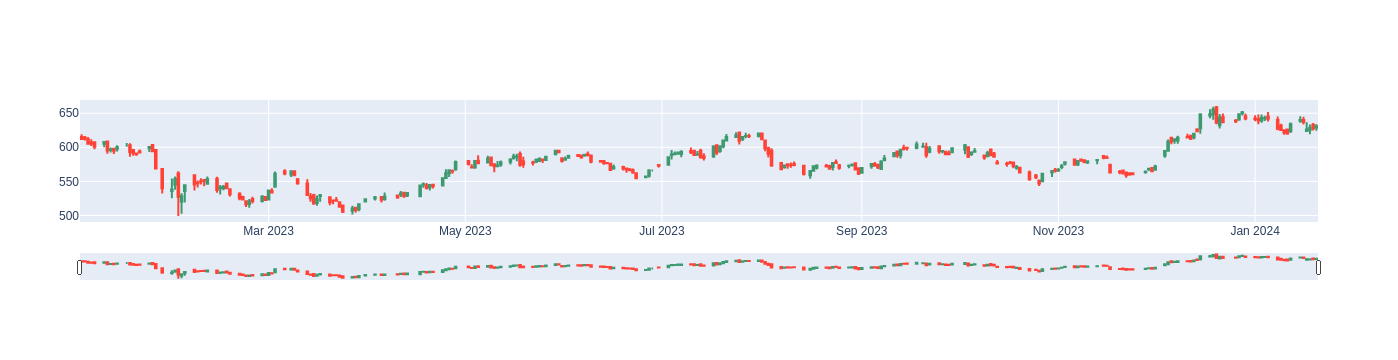

In [3]:

fig = go.Figure(go.Candlestick(x=df.index,
  open=df['Open'],
  high=df['High'],
  low=df['Low'],
  close=df['Close']))

fig.show()
     

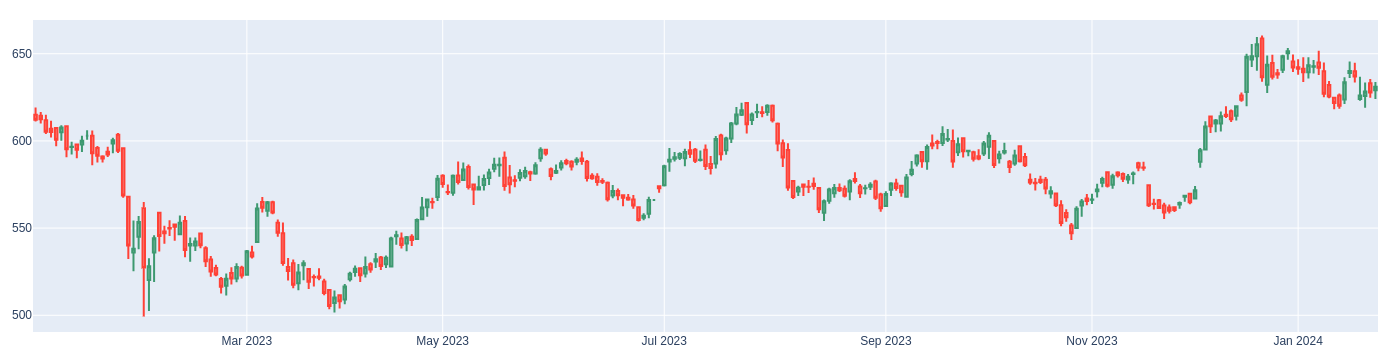

In [4]:
# removing rangeslider
fig.update_layout(xaxis_rangeslider_visible=False)

# removing all empty dates
# build complete timeline from start date to end date
dt_all = pd.date_range(start=df.index[0],end=df.index[-1])
# retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(df.index)]
# define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]
fig.update_layout(xaxis_rangebreaks=[dict(values=dt_breaks)])
fig.update_layout(margin=go.layout.Margin(
        l=20, #left margin
        r=20, #right margin
        b=20, #bottom margin
        t=20  #top margin
    ))
fig.show()

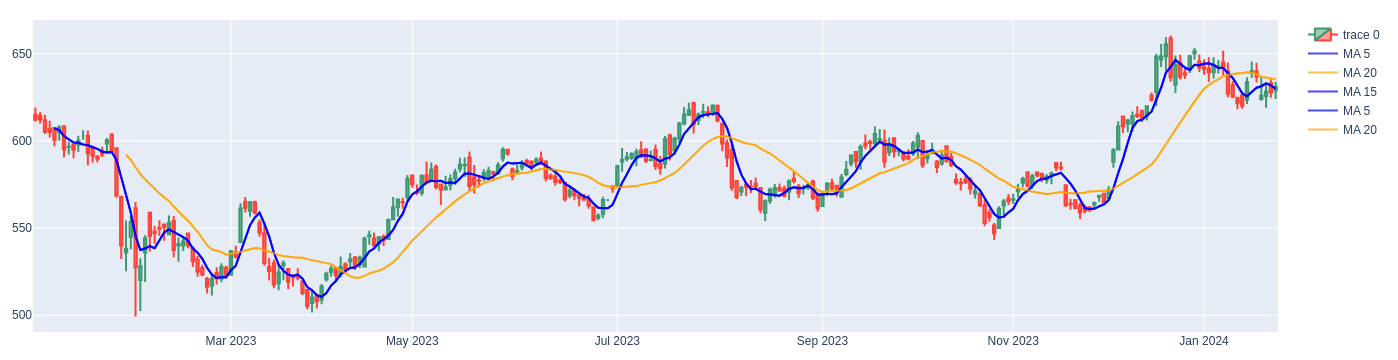

In [7]:
# add moving averages to df
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA5'] = df['Close'].rolling(window=5).mean()
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA5'], 
                         opacity=0.7, 
                         line=dict(color='blue', width=2), 
                         name='MA 5'))
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA20'], 
                         opacity=0.7, 
                         line=dict(color='orange', width=2), 
                         name='MA 20'))
fig.show()

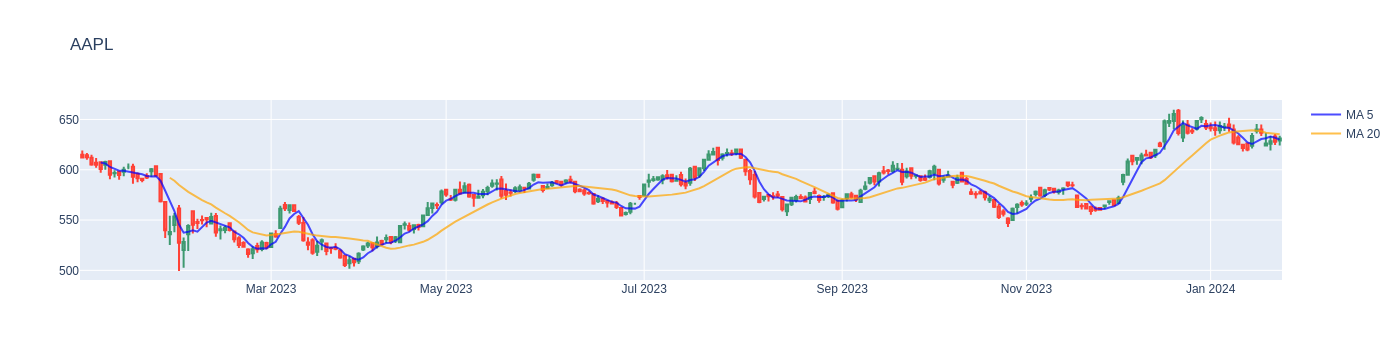

In [8]:
# first declare an empty figure
fig = go.Figure()
# add OHLC trace
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'], 
                             showlegend=False))
# add moving average traces
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA5'], 
                         opacity=0.7, 
                         line=dict(color='blue', width=2), 
                         name='MA 5'))
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA20'], 
                         opacity=0.7, 
                         line=dict(color='orange', width=2), 
                         name='MA 20'))
# hide dates with no values
fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])
# remove rangeslider
fig.update_layout(xaxis_rangeslider_visible=False)
# add chart title 
fig.update_layout(title="AAPL")
fig.show()

In [9]:

from ta.trend import MACD
from ta.momentum import StochasticOscillator

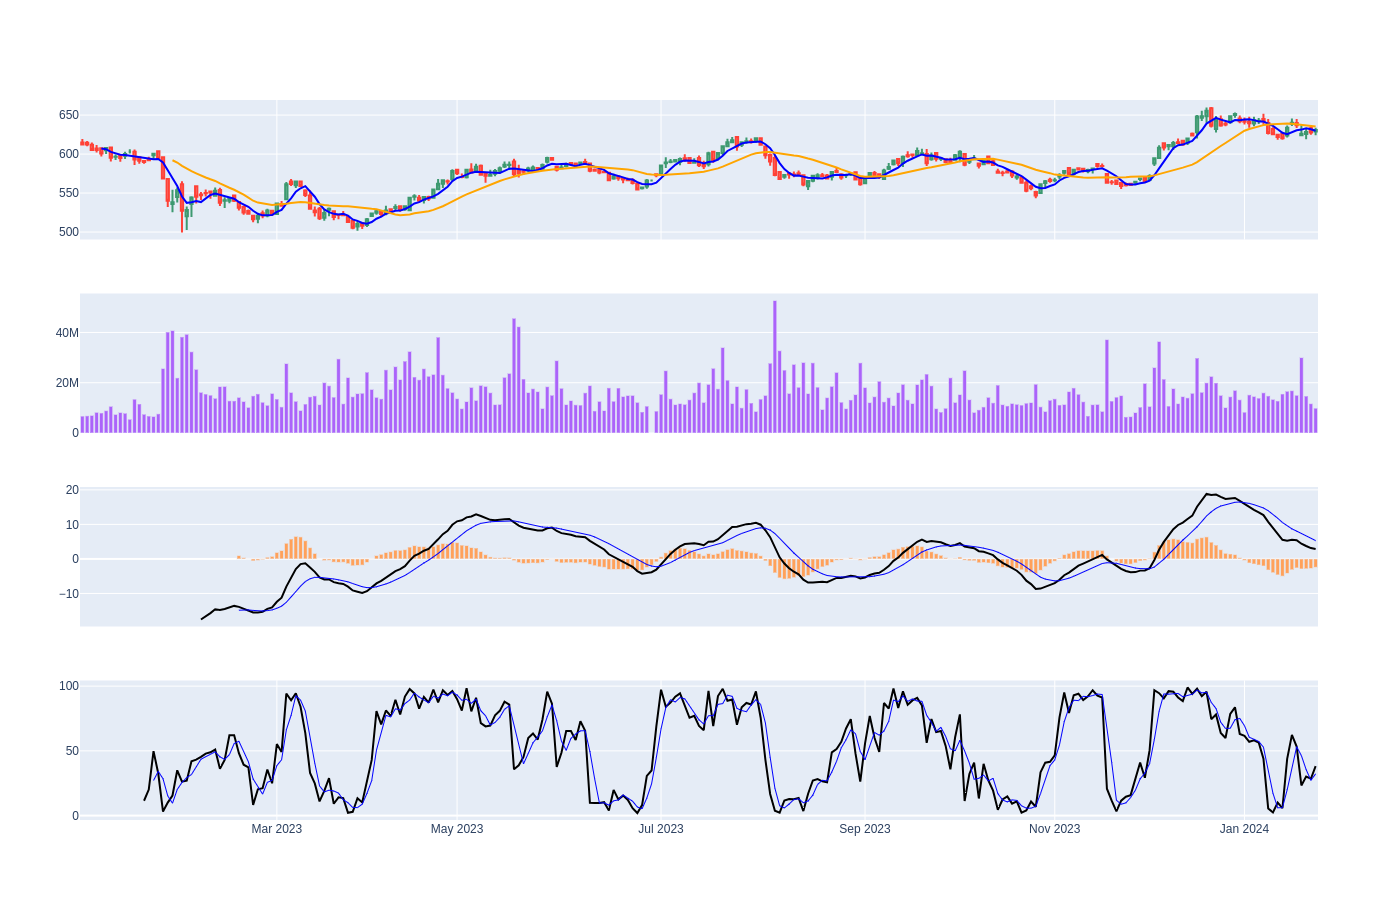

In [10]:
# MACD
macd = MACD(close=df['Close'], 
            window_slow=26,
            window_fast=12, 
            window_sign=9)
# stochastics
stoch = StochasticOscillator(high=df['High'],
                             close=df['Close'],
                             low=df['Low'],
                             window=14, 
                             smooth_window=3)

fig = make_subplots(rows=4, cols=1, shared_xaxes=True)

# Plot OHLC on 1st subplot (using the codes from before)
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'], 
                             showlegend=False))
# add moving average traces
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA5'], 
                         line=dict(color='blue', width=2), 
                         name='MA 5'))
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA20'], 
                         line=dict(color='orange', width=2), 
                         name='MA 20'))

# Plot volume trace on 2nd row 
fig.add_trace(go.Bar(x=df.index, 
                     y=df['Volume']
                    ), row=2, col=1)

# Plot MACD trace on 3rd row
fig.add_trace(go.Bar(x=df.index, 
                     y=macd.macd_diff()
                    ), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=macd.macd(),
                         line=dict(color='black', width=2)
                        ), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=macd.macd_signal(),
                         line=dict(color='blue', width=1)
                        ), row=3, col=1)

# Plot stochastics trace on 4th row 
fig.add_trace(go.Scatter(x=df.index,
                         y=stoch.stoch(),
                         line=dict(color='black', width=2)
                        ), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=stoch.stoch_signal(),
                         line=dict(color='blue', width=1)
                        ), row=4, col=1)

# update layout by changing the plot size, hiding legends & rangeslider, and removing gaps between dates
fig.update_layout(height=900, width=1200, 
                  showlegend=False, 
                  xaxis_rangeslider_visible=False,
                  xaxis_rangebreaks=[dict(values=dt_breaks)])

fig.show()

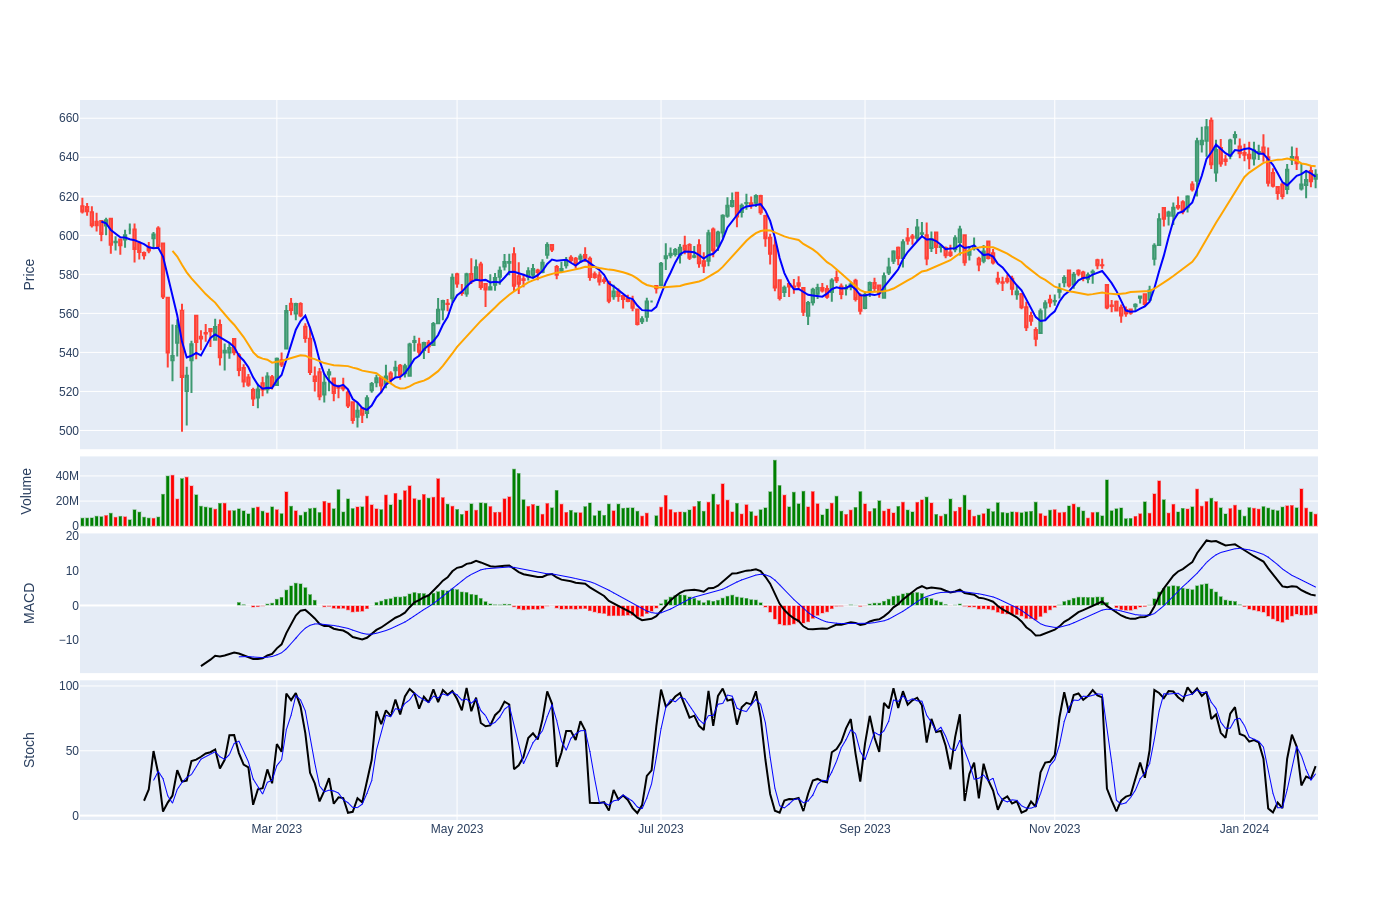

In [11]:
# add subplot properties when initiliazing fig variable
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, 
                    row_heights=[0.5,0.1,0.2,0.2])
# Plot OHLC on 1st subplot (using the codes from before)
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'], 
                             showlegend=False))
# add moving average traces
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA5'], 
                         line=dict(color='blue', width=2), 
                         name='MA 5'))
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA20'], 
                         line=dict(color='orange', width=2), 
                         name='MA 20'))

# Plot volume trace on 2nd row 
colors = ['green' if row['Open'] - row['Close'] >= 0 
          else 'red' for index, row in df.iterrows()]
fig.add_trace(go.Bar(x=df.index, 
                     y=df['Volume'],
                     marker_color=colors
                    ), row=2, col=1)

# Plot MACD trace on 3rd row
colors = ['green' if val >= 0 
          else 'red' for val in macd.macd_diff()]
fig.add_trace(go.Bar(x=df.index, 
                     y=macd.macd_diff(),
                     marker_color=colors
                    ), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=macd.macd(),
                         line=dict(color='black', width=2)
                        ), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=macd.macd_signal(),
                         line=dict(color='blue', width=1)
                        ), row=3, col=1)

# Plot stochastics trace on 4th row 
fig.add_trace(go.Scatter(x=df.index,
                         y=stoch.stoch(),
                         line=dict(color='black', width=2)
                        ), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=stoch.stoch_signal(),
                         line=dict(color='blue', width=1)
                        ), row=4, col=1)

# update layout by changing the plot size, hiding legends & rangeslider, and removing gaps between dates
fig.update_layout(height=900, width=1200, 
                  showlegend=False, 
                  xaxis_rangeslider_visible=False,
                  xaxis_rangebreaks=[dict(values=dt_breaks)])

# update y-axis label
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)
fig.update_yaxes(title_text="MACD", showgrid=False, row=3, col=1)
fig.update_yaxes(title_text="Stoch", row=4, col=1)

fig.show()

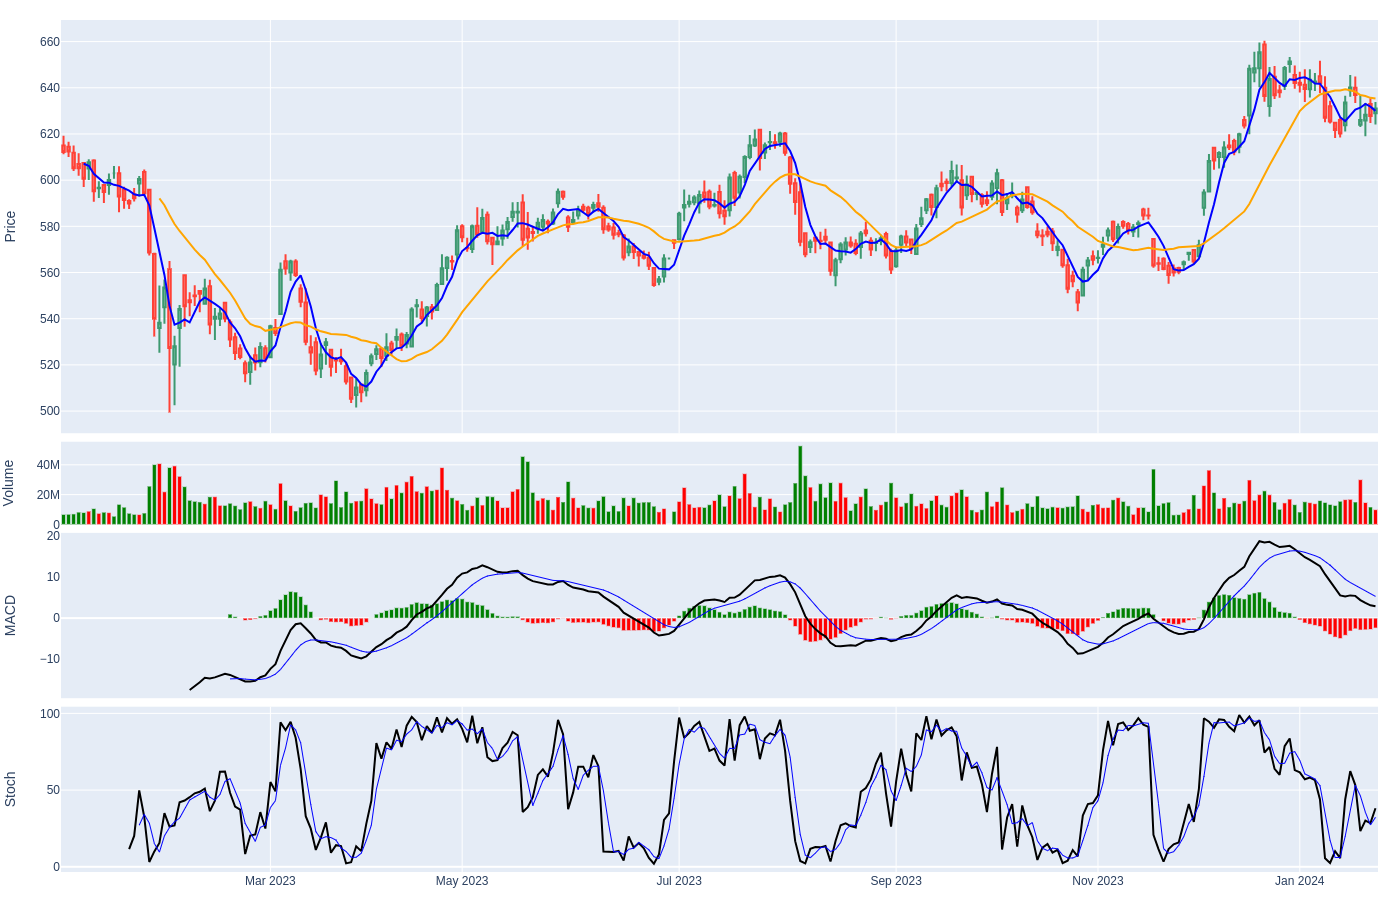

In [12]:
# removing white spaces
fig.update_layout(margin=go.layout.Margin(
        l=20, #left margin
        r=20, #right margin
        b=20, #bottom margin
        t=20  #top margin
    ))

fig.show()
     
